# Statistiköversikt för kollektivtrafik
Med detta dokument har jag för avsikt att börja studera följande frågor, och om möjligt kvantifiera hur en förändring av förhållandena skulle kunna verka positivt på Sveriges klimatpåverkan.

Ett av delmålen är att själv läsa in och hantera data från olika källor, till att börja med http://www.statistikdatabasen.scb.se . Mycket av datan finns dock mer tillförlitligt analyserat på https://www.trafa.se/sidor/transportlaget/

* **Hur stor del av Sveriges CO$_2$-utsläpp beror på persontransport?**
    * **Analys klar:** Se nedan. Ca 25% av Sveriges CO$_2$-utsläpp beror på inrikes transporter. Den största enskilda posten (omkring 3-4 ggr större än den andra posten och omkring 60% av totalsiffran) står biltrafiken för. Det innebär att ett fullständigt ersättande av bilismen med t ex spårburen kollektivtrafik eller dylikt kan sänka de svenska utsläppen med maximalt **15%**.
    <br><br>
    
* **Hur stor del av utsläppen från persontransport kommer av kortare resor (t ex pendling Angered-Hisingen)?**
    * Hur står sig lokaltrafik mot bilism i termer av kostnad och restid?
    * Hur främjas cykling eller gång för kortare persontransporter?
    * ...
    
* **Hur stor del av utsläppen från persontransport kommer av regionala resor (t ex Kungsbacka-Göteborg)?**
    * Hur står sig regionaltrafik mot bilism i termer av kostnad och restid?
    * ...
    
* **Hur stor del av utsläppen från persontransport kommer av interregionala resor (t ex Göteborg-Stockholm)?**
    * Hur står sig tåg (och buss) mot bil och flyg i termer av kostnad och restid?
    * ...
    
* **Hur stor del av utsläppen från persontransport kommer av internationella resor (t ex Göteborg-Rom)?**
    * Hur står sig tåg mot bil och flyg i termer av kostnad och restid?
    * ...
    

## Hur stor del av Sveriges CO$_2$-utsläpp beror på persontransport?

In [1]:
#from pyscbwrapper import SCB
import json
import lxml.html as lh
import matplotlib.pyplot as plt
import pandas as pd
import requests

%matplotlib inline

In [2]:
from ifk_scb_compilations.queries.passenger_transport import Request_input

# starta en session, anropa api på scb med den på hemsidan nedladdade frågan och
session = requests.Session()
response = session.post(Request_input.url, json=Request_input.query)
response_json = json.loads(response.content.decode('utf-8-sig'))
columns=pd.DataFrame(response_json['columns'])
data=pd.DataFrame(response_json['data'])

In [3]:
import ifk_scb_compilations.queries.passenger_transport as passenger_transport

data_dict = {'emission measure': list(response_json['data'][i]['key'][0] for i in range(len(data.index))),
            'emission type': list(response_json['data'][i]['key'][1] for i in range(len(data.index))),
            'year': list(float(response_json['data'][i]['key'][2]) for i in range(len(data.index))),
            'value': list(float(response_json['data'][i]['values'][0]) for i in range(len(data.index))),
            }

data_df = pd.DataFrame.from_dict(data_dict)
passenger_analysis = passenger_transport.Analysis(response_json)



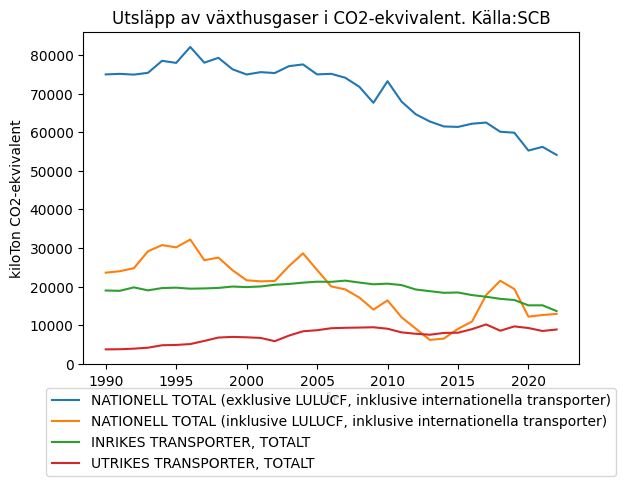

In [4]:

passenger_analysis.plot_co2_transports()

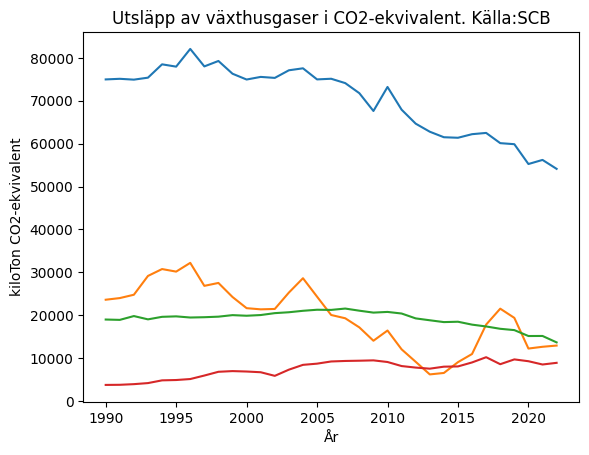

### Vad är LULUCF?
http://www.naturvardsverket.se/Sa-mar-miljon/Statistik-A-O/Vaxthusgaser-utslapp-och-upptag-fran-markanvandning/

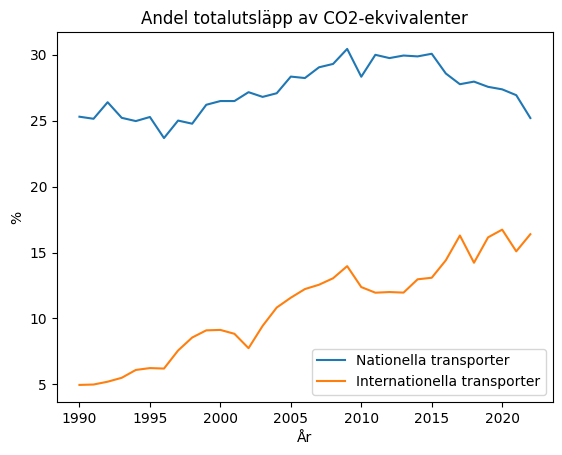

In [5]:
passenger_analysis.plot_co2_national_international()

### Inrikestransporter: Persontrafik/Godstrafik
I översikten ovan från SCB framgår det att ca 25% av de samlade CO$_2$-utsläppen kommer från inrikestrafik, vilket är den del som kan tänkas påverkas positivt genom att fler persontransporter görs med kollektivtrafik. Vi går därför vidare till en annan källa, Trafikverket, för att genom dem och Naturvårdsverket titta närmare på data över transportsektorns utsläpp av växthusgaser.

De har gjort en egen jämförelse, i vilken följande slutsatser presenteras:

https://www.trafikverket.se/for-dig-i-branschen/miljo---for-dig-i-branschen/energi-och-klimat/jamfor-trafikslag/

#### Egen dataanalys
Den egna dataanalysen får börja med att parsea data. Då naturvårdsverket så vitt jag förstått det inte har ett JSON-system för att hämta data behöver vi skriva vår egen html-skrapa. (Som väl är finns det tips på webben).

In [29]:

csv_url = 'blob:https://www.naturvardsverket.se/676bc165-41dd-4cf6-9ff7-fe5ec579f4e4'
with requests.Session() as s:
    download = s.get(csv_url)

    decoded_content = download.content.decode('utf-8')

print(decoded_content)

InvalidSchema: No connection adapters were found for 'blob:https://www.naturvardsverket.se/676bc165-41dd-4cf6-9ff7-fe5ec579f4e4'

In [21]:

page=requests.get('https://www.naturvardsverket.se/Sa-mar-miljon/Statistik-A-O/Vaxthusgaser-utslapp-fran-inrikes-transporter/')

doc = lh.fromstring(page.content)#Parse data that are stored between <tr>..</tr> of HTML
tr_elements = doc.xpath('//tr')
print(page.content)
col=[]

for j in range(0,len(tr_elements)):
    if len(tr_elements[j])<len(tr_elements[0]):
        break
    name=tr_elements[j][0].text_content()
    col.append((name,[])) #gör en lista med rubrik plus data
    T=tr_elements[j]

    for t in T.iterchildren(): #Iterate through each element of the row
        data=t.text_content()
        print(data)
        try:
            data=int(data)
        except:
            continue
        col[j][1].append(data)


Dict={title:column for (title,column) in col}
df=pd.DataFrame(Dict)

b'\r\n\r\n<!DOCTYPE html>\r\n<html lang="sv">\r\n<head>\r\n\r\n\r\n    <title data-react-helmet="true">Inrikes transporter, utsl\xc3\xa4pp av v\xc3\xa4xthusgaser</title><meta data-react-helmet="true" name="description" content="Utsl\xc3\xa4pp av v\xc3\xa4xthusgaser fr\xc3\xa5n inrikes transporter svarar f\xc3\xb6r knappt en tredjedel av Sveriges totala utsl\xc3\xa4pp. Sedan 1990 har utsl\xc3\xa4ppen minskat med 28 procent. Huvuddelen av v\xc3\xa4xthusgasutsl\xc3\xa4ppen inom transportsektorn kommer fr\xc3\xa5n v\xc3\xa4gtrafiken, d\xc3\xa4r utsl\xc3\xa4pp fr\xc3\xa5n personbilar och tunga fordon dominerar."/><meta data-react-helmet="true" name="google-site-verification" content="JMJfi22Npr5enFLEKAZzsvFc17VNpoXwUV-P7t64gQY"/><meta data-react-helmet="true" property="og:type" content="website"/><meta data-react-helmet="true" property="og:title" content="Inrikes transporter, utsl\xc3\xa4pp av v\xc3\xa4xthusgaser"/><meta data-react-helmet="true" property="og:description" content="Utsl\xc3\x

In [15]:
print(df.columns.values)

[]


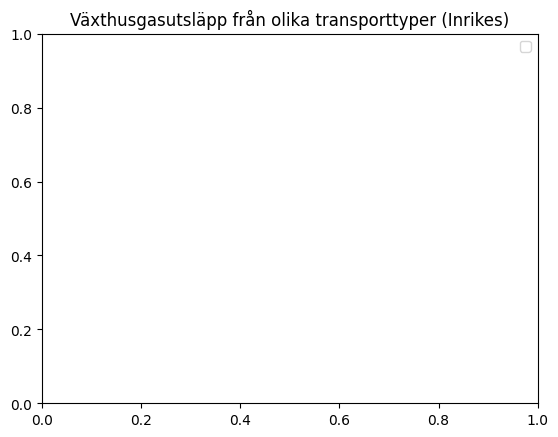

In [8]:
mylegend=[]
for val in df.columns.values:
    if val == '' or val == 'Totalt':
        continue
    plt.plot(df[''],df[val])
    mylegend.append(val)
plt.legend(mylegend)
plt.title('Växthusgasutsläpp från olika transporttyper (Inrikes)')
plt.show()

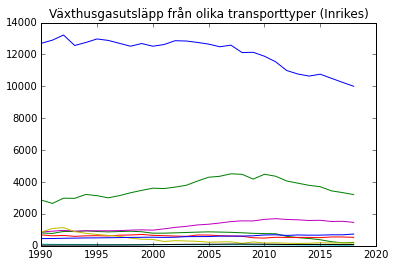

In [121]:
# samma plot utan jättelegenden
mylegend=[]
for val in df.columns.values:
    if val == '' or val == 'Totalt':
        continue
    plt.plot(df[''],df[val])
    mylegend.append(val)

plt.title('Växthusgasutsläpp från olika transporttyper (Inrikes)')
plt.show()

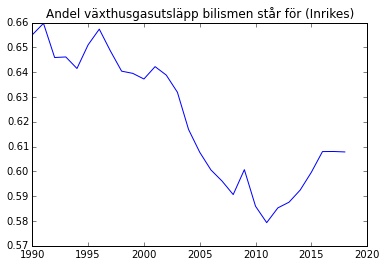

0.607847901355


In [120]:
bilism_factor=df['Bilar']/df['Totalt']
plt.plot(df[''],bilism_factor)
plt.title('Andel växthusgasutsläpp bilismen står för (Inrikes)')
plt.show()
print(bilism_factor[len(bilism_factor)-1])


## Hur ser fördelningen för bilresors längd ut?
Letar efter datakällor för denna del av analysen. Finns en spännande analysrapport från 2016 publicerad på SCB:s hemsida som beskriver Svenska folkets resevanor baserat på frågeformulär:
https://www.trafa.se/globalassets/statistik/resvanor/2016/rvu_sverige_2016-reviderad-7-juli.pdf
Där det i tabell 3 konstateras att den kortaste restypen, arbets-, tjänste- och skolbilresor är $25\pm3$km långa, medan den längsta, fritidsbilresor är $58\pm5$km långa. I genomsnitt är bilresor $36\pm2$km. I länken nedan finns uppdaterade versioner, snubblade in på länken ovan via google (oklart varför).

https://www.trafa.se/kommunikationsvanor/RVU-Sverige/

På trafikverket presenteras följande: 

https://www.trafikverket.se/resa-och-trafik/Dina-val-gor-skillnad/ 

Här uppmanas Svenskarna att köra bränslesnålt eller välja mer klimatsmarta alternativ än ensampendling.

### Utsläpp och kostnad för resa Angered-Hisingen
Sedan har jag provat https://www.transportmeasures.org/ntmcalc/v4/basic/index.html#/ för att få någon form av hum om hur koldioxidutsläppen på olika sträckor ser ut Bensinpriser kommer från https://www.ingo.se/v%C3%A5ra-l%C3%A5ga-priser/aktuella-listpriser. Resa inom Göteborg - kortare resa, två exempel:

<h3>Till jobbet (06:45):</h3>
<ul>
<li><b>Bil:</b>
    <ul>
    <li> <b>CO$_2$-utsläpp: 1.019kg</b>
    <li> <b>Kostnad:</b> Förbrukning 0.7l/mil 13.58kr/l 9km -> 0.7$\times$0.9$\times$13.58=8,50kr + Trängselskatt 16kr = <b>24,50kr</b>
    </ul>
<li> <b>Vagn/buss:</b>
    <ul>
    <li> <b>CO$_2$-utsläpp: 0.8716kg</b> buss (betydligt lägre för vagnen)
    <li> <b>Kostnad:</b> Enkelbiljett: <b>34kr</b> Månadskort 795kr / (2 $\times$ 5 dagar i veckan $\times$ 4,3 veckor): <b>18,50kr</b>
    </ul>
</ul>
<br><br>        
<h3>Barnfamilj helgresa Angered-Hisingen:</h3>
<ul>
    <li> <b>Bil:</b>
        <ul>
            <li> <b>CO$_2$-utsläpp: 1.019kg</b>
            <li> <b>Kostnad:</b> Förbrukning 0.7l/mil 13.58kr/l 9km -> 0.7$\times$0.9$\times$13.58=<b>8,50kr</b>
        </ul>
    <li> <b>Vagn/buss:</b>
        <ul>
            <li> <b>CO$_2$-utsläpp: >0.8716kg</b> buss (betydligt lägre för vagnen)
            <li> <b>Kostnad:</b> Enkelbiljett: 2$\times$34kr + 3$\times$26kr = <b>146kr</b>
        </ul>
</ul>

### Utsläpp och kostnad för resa Göteborg-Stockholm
Här kommer också hur sträckan Gbg-Sthlm ser ut för olika transportalternativ. Överslagsberäkningar/googlingar för kostnader har också utförts.
* **Bil:** 
    * **CO$_2$-utsläpp:** **51.55kg** 
    * **Kostnad:** Förbrukning 0.7l/mil 13.58kr/l 478km -> 0.7$\times$47.8$\times$13.58=**454kr**
    * https://www.transportstyrelsen.se/sv/vagtrafik/Trangselskatt/Trangselskatt-i-goteborg/Tider-och-belopp-i-Goteborg/
    * https://www.transportstyrelsen.se/sv/vagtrafik/Trangselskatt/Trangselskatt-i-stockholm/tider-och-belopp/
* **Flyg:** 
    * **CO$_2$-utsläpp:** **107.7kg**
    * **Kostnad:** **1249kr** med en veckas förbokning en Söndag. (sas.se 15/11 resdatum 22/11)
* **Tåg:** 
    * **CO$_2$-utsläpp:** **0.3453kg**
    * **Kostnad:** **295-805kr** i 2:a klass med en veckas förbokning en Söndag (sj.se 15/11 resdatum 22/11)

https://www.trafa.se/globalassets/pm/2018/pm-2018_9-sa-reser-vi-baserat-pa-socioekonomi.pdf